# Descripción del proyecto

Trabajo para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.
Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.
El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto

###### Ojetivo General

Identificar los factores clave que definen el éxito de un videojuego a través del análisis de datos históricos, explorando patrones en géneros, plataformas, calificaciones y ventas. Este proyecto busca no solo optimizar campañas publicitarias para Ice en 2017, sino también sentar las bases para aprovechar el poder de la Ciencia de Datos en la toma de decisiones estratégicas. Como la culminación del Módulo I de mi bootcamp, este trabajo representa el inicio de un camino hacia soluciones innovadoras y un impacto real en la conexión con millones de jugadores alrededor del mundo.


¡Mi verdadero desafío apenas comienza!

## Inicialización

Cargar todas las librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from scipy.stats import ttest_ind
from scipy.stats import levene

## Cargar datos

In [3]:
# Carga los archivos de datos
df = pd.read_csv('/datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df = pd.read_csv('/datasets/games.csv')
df.head(50)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Preparar los datos

In [5]:
# Dejar el nombre de las columnas en minúsculas
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
# Convertir los datos en los tipos necesarios
df['platform'] = df['platform'].astype('category')
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['genre'] = df['genre'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  category
 2   year_of_release  16446 non-null  Int64   
 3   genre            16713 non-null  category
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       10014 non-null  object  
 10  rating           9949 non-null   object  
dtypes: Int64(1), category(2), float64(5), object(3)
memory usage: 1.2+ MB


In [7]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


###### Descripción de las columnas ¿Porqué los tipos de datos han sido cambiados?

* platform / Tipo original: object / Cambio: category	/  Motivo cambio: Eficiencia en análisis.

* year_of_release / Tipo original: float64 / Cambio: Int64	/  Motivo cambio: Precisión semántica y soporte devalores nulos.   

* genre / Tipo original: object / Cambio: category /  Motivo cambio: Precisión semántica.      		

* user_score / Tipo original: object / Cambio: float64 /  Motivo cambio: Habilitar cálculos numéricos tras limpiar datos.          
			
* rating / Tipo original: object / Cambio: category /  Motivo cambio: significado categórico.

* Sumado a lo anterior algunos tipos de datos también se cambiaron para optimización de memoria, esto no solo mejora la eficiencia del análisis, sino que también amplía la capacidad para trabajar con datos complejos.

### Procesar los valores ausentes

In [8]:
# Reemplazar los valores "tbd" por NaN en la columna 'user_score'
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].fillna(df['user_score'].median())

df['na_sales'] = pd.to_numeric(df['na_sales'], errors='coerce')
df['eu_sales'] = pd.to_numeric(df['eu_sales'], errors='coerce')
df['jp_sales'] = pd.to_numeric(df['jp_sales'], errors='coerce')

df['na_sales'] = df['na_sales'].fillna(0)
df['eu_sales'] = df['eu_sales'].fillna(0)
df['jp_sales'] = df['jp_sales'].fillna(0)

In [9]:
# Limpiar los valores NaN en las columnas específicas
df = df.dropna(subset=['user_score', 'critic_score', 'rating'])

In [10]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E


###### Explicación:

* La columna user_score almacena ponderaciones. Los valores son "tbd", que significa to be determined. "tbd" no es un valor numérico, por lo que no tiene sentido mantenerlo en una columna de puntuaciones. Convertir "tbd" a NaN asegura que esos valores sean tratados como datos faltantes, lo que me permitirá aplicar técnicas estándar para procesar valores ausentes.

* Las columnas 'sales' (na_sales, eu_sales, jp_sales, other_sales) representan datos de ventas. Si estas tienen valores ausentes, es razonable asumir que no hubo ventas registradas. Por tanto reemplacé los valores faltantes con 0, debido a que evita eliminar filas completas que tengan datos útiles y por tanto me permitirá sumar las ventas totales por juego sin errores derivados de datos faltantes.


### Análisis de Datos Faltantes
Generalmente se puede evidenciar problemas en la recopilación de datos. 

Aquí un desglose por item:

* user_score: Falta de participación de los usuarios. La etiqueta "tbd" indica que las puntuaciones estaban pendientes de actualización o no se registraron.

* rating: Algunos juegos carecen de clasificación ESRB porque no es necesaria en ciertos países, son juegos antiguos, independientes o distribuidos digitalmente.

* sales: Los valores faltantes reflejan ausencia de ventas en ciertas regiones, retrasos en los reportes o errores técnicos.

* critic_score: La falta de revisiones críticas ocurre en juegos menos populares, recientes o independientes.

In [11]:
sales_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

df['total_sales'] = df[sales_columns].sum(axis=1)

df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80


## Analiza los datos

### Lanzamiento de juegos por año

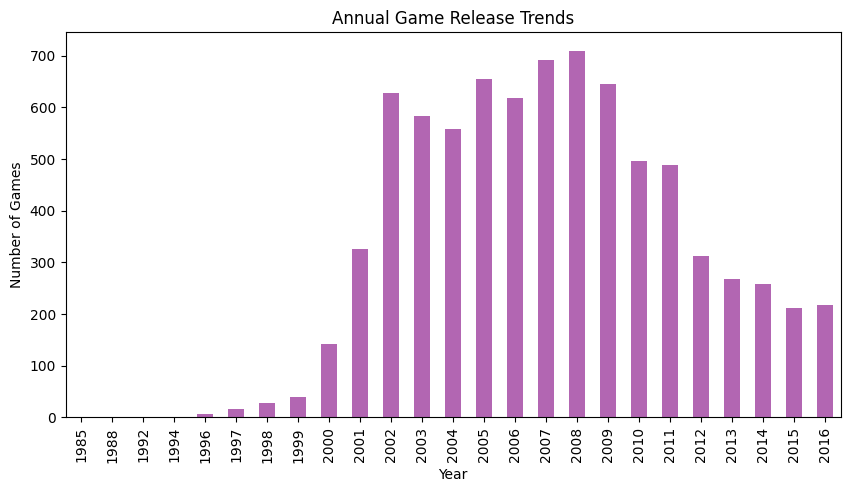

1985    0.012655
1988    0.012655
1992    0.012655
1994    0.012655
1996    0.088585
1997     0.20248
1998    0.341686
1999    0.493546
2000    1.797013
2001    4.125538
2002      7.9347
2003    7.390534
2004    7.061503
2005    8.276386
2006     7.83346
2007    8.757277
2008    8.985067
2009    8.162491
2010    6.289547
2011    6.175652
2012    3.961023
2013    3.378891
2014    3.264996
2015    2.682865
2016     2.74614
Name: year_of_release, dtype: Float64


In [12]:
# Contar cuántos juegos se lanzaron por año
games_per_year = df['year_of_release'].value_counts().sort_index()

games_per_year.plot(kind='bar',
                   color='purple',
                   alpha=0.6,
                   title='Annual Game Release Trends',
                   xlabel='Year',
                   ylabel='Number of Games',
                   figsize=(10, 5))

plt.show()

# calcular porcentaje de juegos lanzados por año
games_percentage = games_per_year / games_per_year.sum() * 100
print(games_percentage)

###  Ventas entre plataformas

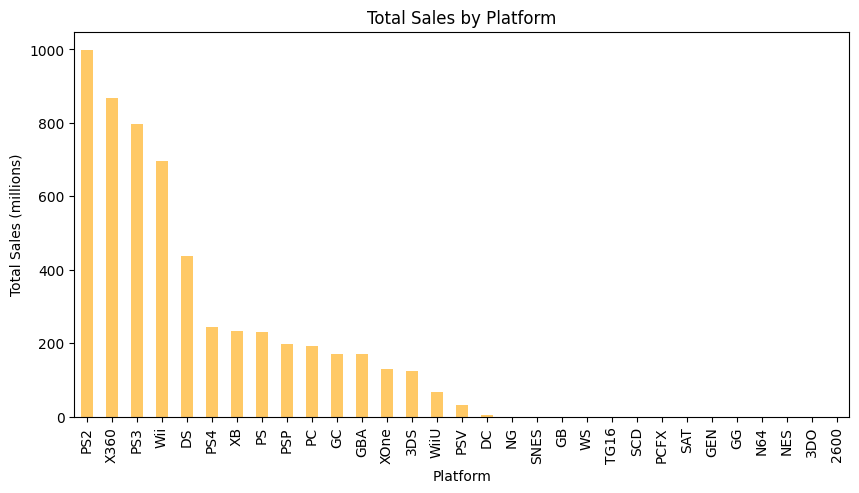

In [13]:
# Calcular ventas totales por plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform_sales.plot(kind='bar',
                   color='orange',
                   alpha=0.6,
                   title='Total Sales by Platform',
                   xlabel='Platform',
                   ylabel='Total Sales (millions)',
                   figsize=(10, 5))

plt.show()

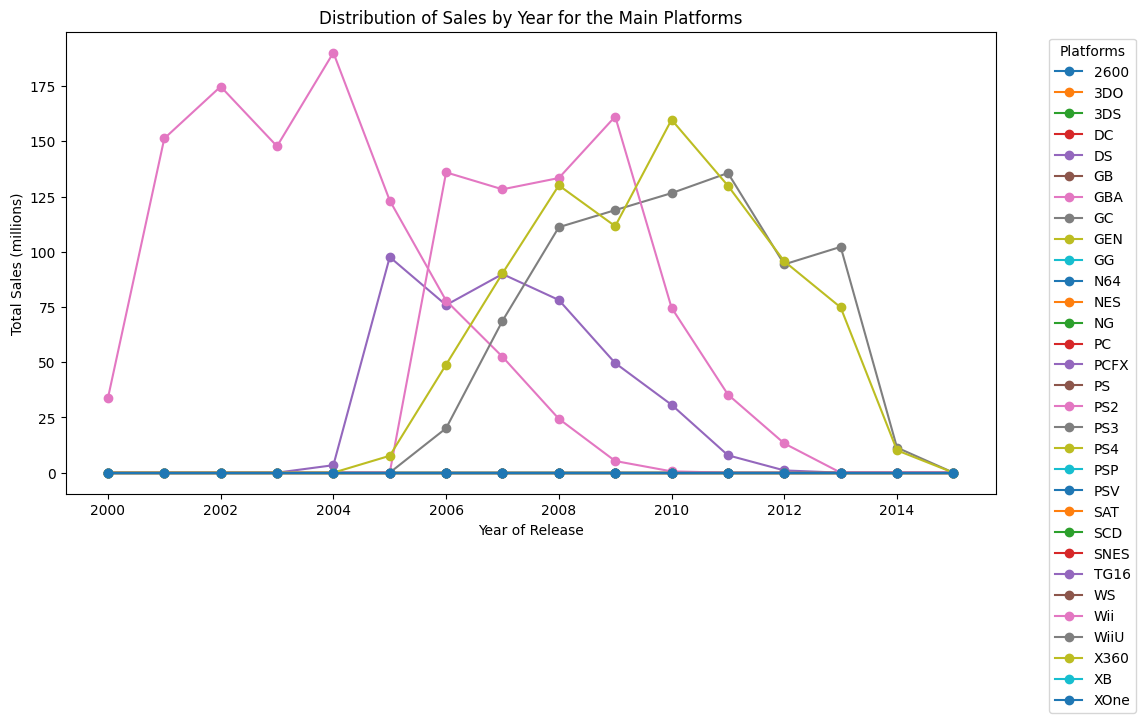

In [14]:
# Seleccionar las 5 plataformas con mayores ventas
top_platforms = platform_sales.head(5).index

filtered_data = df[df['platform'].isin(top_platforms)]

yearly_sales = filtered_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Graficar la distribución
yearly_sales.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Distribution of Sales by Year for the Main Platforms')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (millions)')
plt.legend(title='Platforms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

###### El ciclo de vida promedio de las plataformas

* Las plataformas principales suelen durar entre 5 y 10 años en promedio, aunque existen casos excepcionales de plataformas muy exitosas que pueden extenderse más allá.

* Las nuevas plataformas generalmente aparecen cada 4-6 años, según la frecuencia de lanzamientos de hardware de empresas como Sony, Microsoft y Nintendo.

* La desaparición de una plataforma suele estar relacionada con la falta de soporte, ventas bajas o el lanzamiento de una sucesora.

###  Determinar el período relevante para construir un modelo

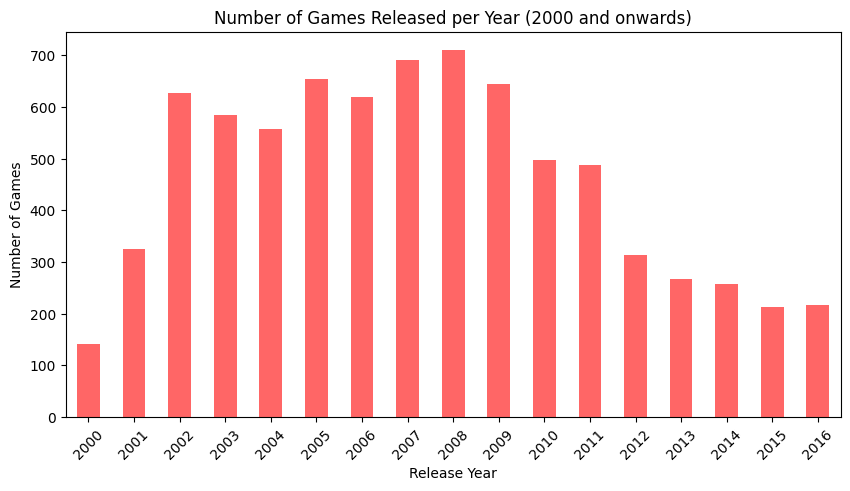

In [15]:
# Filtrar datos a partir del año 2000
filtered_games_per_year = df[df['year_of_release'] >= 2000]['year_of_release'].value_counts().sort_index()

filtered_games_per_year.plot(kind='bar',
                        color='red',
                        alpha=0.6,
                        title='Number of Games Released per Year (2000 and onwards)',
                        xlabel='Release Year',
                        ylabel='Number of Games',
                        rot=45,
                        figsize=(10, 5))

plt.show()

# Filtrar datos relevantes desde el año 2000 para el resto del análisis
relevant_data = df[df['year_of_release'] >= 2000]

###  Plataformas líderes en ventas

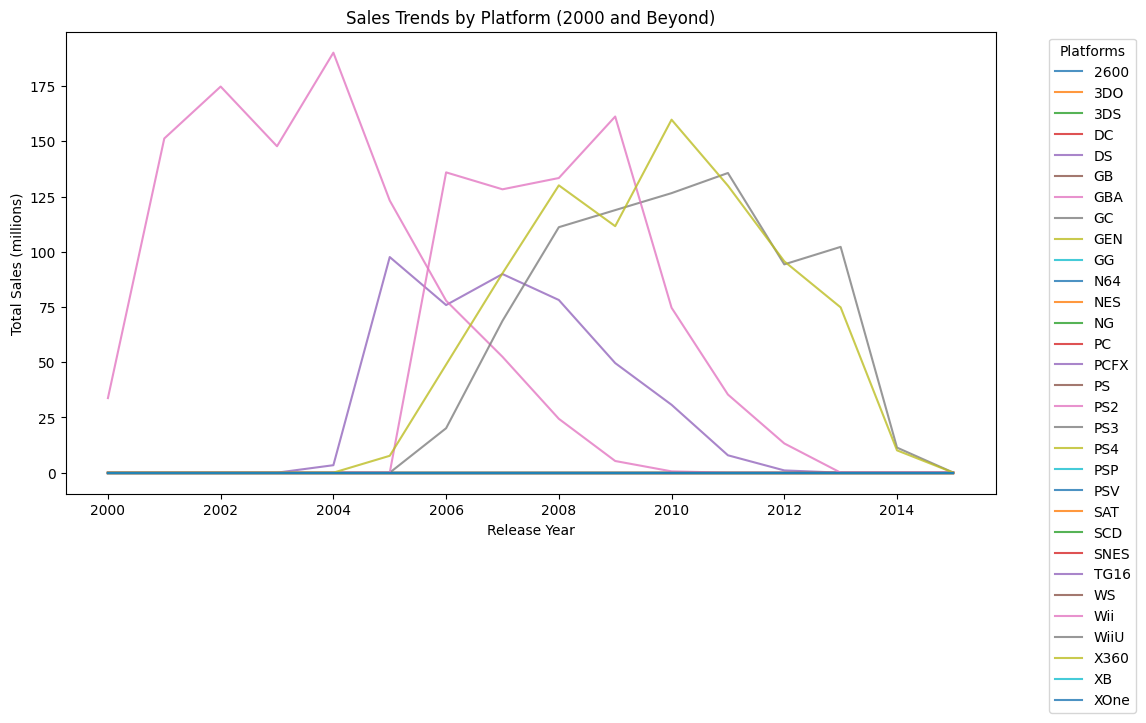

Plataformas potencialmente rentables: ['PS3', 'X360']


In [16]:
# Ventas anuales por plataforma (desde 2000)
platform_yearly_sales = filtered_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack()

# Visualizar tendencias de ventas
platform_yearly_sales.T.plot(figsize=(12, 6), alpha=0.8)
plt.title('Sales Trends by Platform (2000 and Beyond)')
plt.xlabel('Release Year')
plt.ylabel('Total Sales (millions)')
plt.legend(title='Platforms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Identificar plataformas con mayor crecimiento en los últimos años (promedio de las últimas 3)
recent_sales = platform_yearly_sales.loc[:, platform_yearly_sales.columns[-3:]].mean(axis=1)
potential_platforms = recent_sales[recent_sales > recent_sales.mean()].index.tolist()
print(f"Plataformas potencialmente rentables: {potential_platforms}")

###### Basándome en el gráfico, las plataformas que históricamente han liderado las ventas son:

* La familia PlayStation (PS, PS2, PS3, PS4) ha sido consistentemente de las más populares, con picos de ventas significativos en varias generaciones.

* Las consolas de Nintendo, como Nintendo DS, Wii y Switch, también han tenido un gran éxito, especialmente en ciertos segmentos del mercado.

* La marca Xbox de Microsoft ha logrado una sólida base de usuarios, aunque quizás (hasta el momento de los datos) no ha logrado alcanzar los mismos niveles de dominio que PlayStation y Nintendo.

Por otra parte, las plataformas más recientes o innovadoras suelen mostrar un crecimiento, mientras que las más antiguas disminuyen ventas al ser reemplazadas por nuevos modelos o por falta de popularidad.

###  Ventas globales por plataforma

In [17]:
# Filtrar los datos para incluir solo juegos lanzados desde el 2000
sales = df[df['year_of_release'] >= 2000]

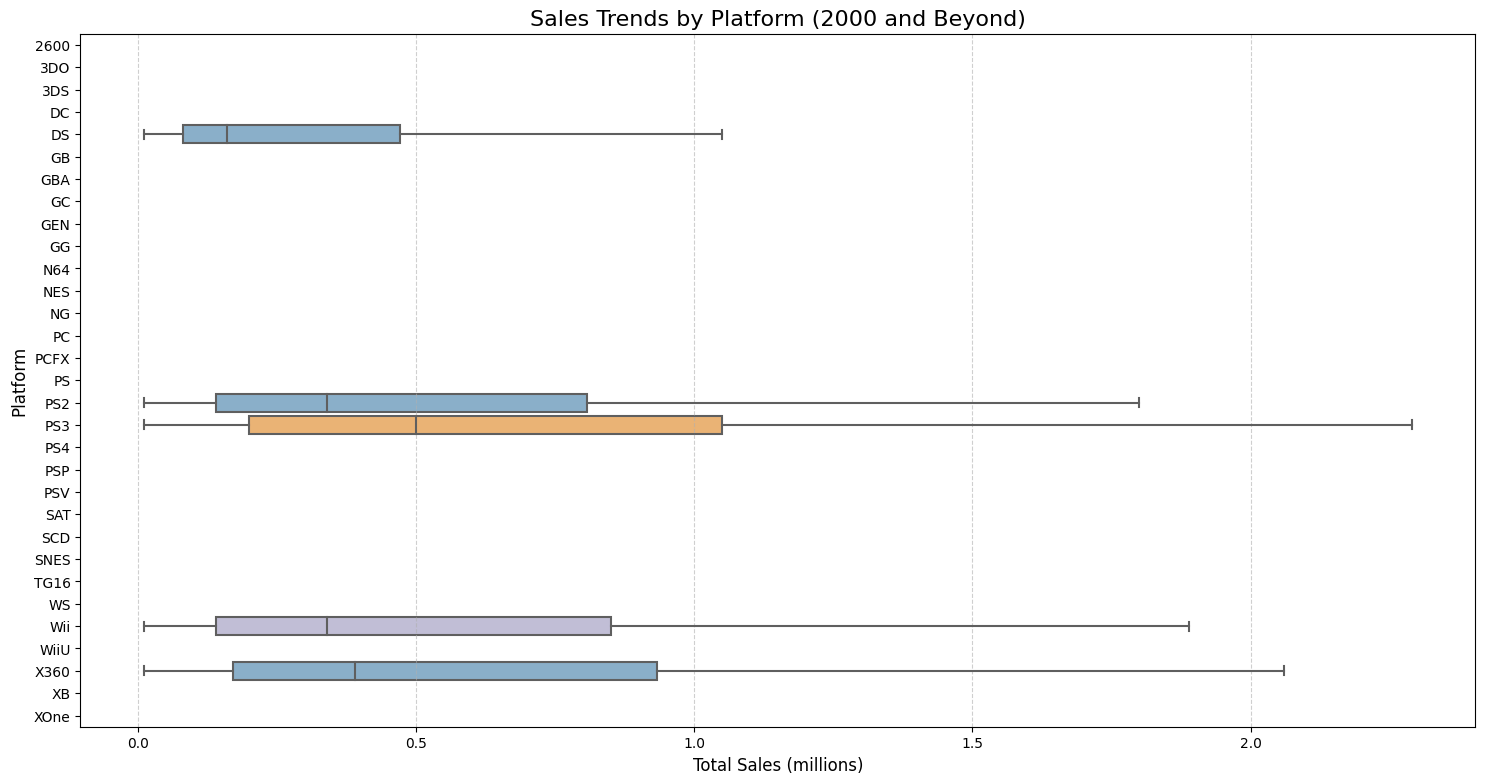

In [18]:
plt.figure(figsize=(18, 9))
sns.boxplot(x='total_sales', y='platform', data=filtered_data, 
            palette='Set3', showfliers=False) 

# Personalizar el gráfico
plt.title('Sales Trends by Platform (2000 and Beyond)', fontsize=16)
plt.xlabel('Total Sales (millions)', fontsize=12)
plt.ylabel('Platform', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

###### Hallazgos del diagrama de caja y bigotes

Diferencias significativas en las ventas:

El diagrama muestra que las ventas globales varían notablemente entre plataformas. Algunas, como Wii y PS2, presentan valores atípicos (outliers) que representan juegos con ventas extraordinarias.
Plataformas más recientes, como PS4 y Xbox One, tienen distribuciones más ajustadas, indicando una menor cantidad de juegos con ventas altas en comparación con generaciones anteriores.

Ventas promedio:

Las plataformas clásicas como PS2 y Wii tienen ventas promedio más altas debido a su éxito histórico y un catálogo con títulos muy populares.
Plataformas de nicho como PSP o PS Vita muestran ventas promedio más bajas, reflejando su menor impacto en el mercado.

Conclusión:
Las plataformas exitosas históricamente dominan las ventas totales, pero las nuevas generaciones (PS4, Xbox One, Switch) muestran estabilidad y potencial para campañas futuras, aunque con menos títulos de ventas masivas hasta el momento.

###  Relación entre reseñas y ventas para XBOX

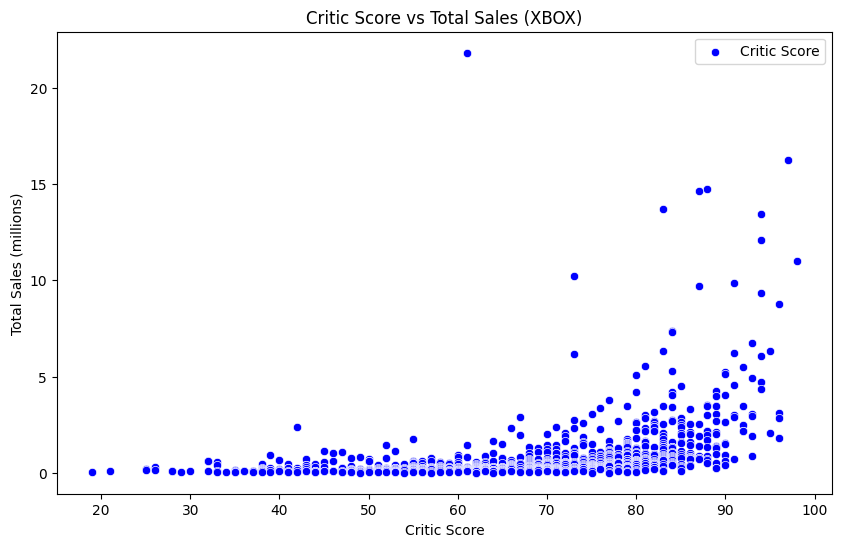

Critic Score Correlation: 0.39509255275452104


In [19]:
# Filtrar los datos solo para la plataforma XBOX
xbox_data = df[df['platform'] == 'X360'].dropna(subset=['critic_score', 'user_score', 'total_sales'])

# Gráfico de dispersión para Critic Score vs Ventas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=xbox_data, color='blue', label='Critic Score')
plt.title('Critic Score vs Total Sales (XBOX)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')
plt.show()

# Calcular la correlación entre Critic Score y Ventas
critic_corr = xbox_data['critic_score'].corr(xbox_data['total_sales'])
print(f'Critic Score Correlation: {critic_corr}')

In [20]:
xbox_data['critic_score'] = pd.to_numeric(xbox_data['critic_score'], errors='coerce')
xbox_data['user_score'] = pd.to_numeric(xbox_data['user_score'], errors='coerce')
xbox_data['total_sales'] = pd.to_numeric(xbox_data['total_sales'], errors='coerce')

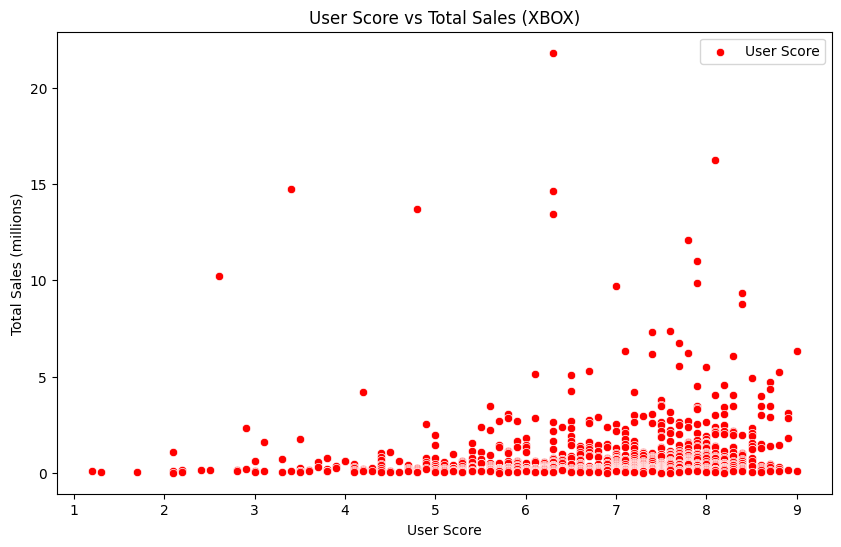

User Score Correlation: 0.10277895941079661


In [21]:
# Gráfico de dispersión para User Score vs Ventas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=xbox_data, color='red', label='User Score')
plt.title('User Score vs Total Sales (XBOX)')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions)')
plt.show()

# Calcular la correlación entre User Score y Ventas
user_corr = xbox_data['user_score'].corr(xbox_data['total_sales'])
print(f'User Score Correlation: {user_corr}')

###### Análisis del gráfico de dispersión:

* La nube de puntos se inclina hacia arriba de izquierda a derecha, lo que confirma la correlación positiva entre ambas variables. Sin embargo, esta relación no es perfecta y existen muchos puntos que se desvían de la tendencia general.

* Los puntos están bastante dispersos, lo que indica que la puntuación de la crítica no es el único factor que determina las ventas de un juego. Otros factores como el marketing, el género del juego, la competencia, etc., también influyen en el éxito comercial de un título.

* Observo algunos puntos que se desvían de la tendencia general, pueden corresponder a juegos con ventas excepcionalmente altas o bajas en comparación con su puntuación de la crítica.

En conclusión: el gráfico sugiere que una buena recepción por parte de la crítica puede ser beneficiosa para las ventas de un juego de Xbox, pero no es un factor determinante.

###  Ventas de juegos en múltiples plataformas

In [22]:
# Filtrar datos desde el año 2000
filtered_data = df[df['year_of_release'] >= 2000]

multi_platform_games = filtered_data.groupby('name')['platform'].nunique()
multi_platform_games = multi_platform_games[multi_platform_games > 1].index

multi_platform_data = filtered_data[filtered_data['name'].isin(multi_platform_games)]

sales_comparison = multi_platform_data.pivot_table(
    index='name',  
    columns='platform',  
    values='total_sales', 
    aggfunc='sum',  
    fill_value=0 
)

sales_comparison.head(10)

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
name,,,,,,,,,,,,,,,,,,,,,
007: Quantum of Solace,0,0,0.0,0.0,0.13,0,0.0,0.00,0,0,...,0,0,0,0,0,0.65,0.0,1.48,0.00,0.0
18 Wheeler: American Pro Trucker,0,0,0.0,0.0,0.00,0,0.0,0.11,0,0,...,0,0,0,0,0,0.00,0.0,0.00,0.00,0.0
187: Ride or Die,0,0,0.0,0.0,0.00,0,0.0,0.00,0,0,...,0,0,0,0,0,0.00,0.0,0.00,0.06,0.0
2002 FIFA World Cup,0,0,0.0,0.0,0.00,0,0.0,0.05,0,0,...,0,0,0,0,0,0.00,0.0,0.00,0.19,0.0
2010 FIFA World Cup South Africa,0,0,0.0,0.0,0.00,0,0.0,0.00,0,0,...,0,0,0,0,0,0.43,0.0,0.85,0.00,0.0
2014 FIFA World Cup Brazil,0,0,0.0,0.0,0.00,0,0.0,0.00,0,0,...,0,0,0,0,0,0.00,0.0,0.43,0.00,0.0
25 to Life,0,0,0.0,0.0,0.00,0,0.0,0.00,0,0,...,0,0,0,0,0,0.00,0.0,0.00,0.17,0.0
4x4 EVO 2,0,0,0.0,0.0,0.00,0,0.0,0.14,0,0,...,0,0,0,0,0,0.00,0.0,0.00,0.24,0.0
50 Cent: Blood on the Sand,0,0,0.0,0.0,0.00,0,0.0,0.00,0,0,...,0,0,0,0,0,0.00,0.0,0.21,0.00,0.0


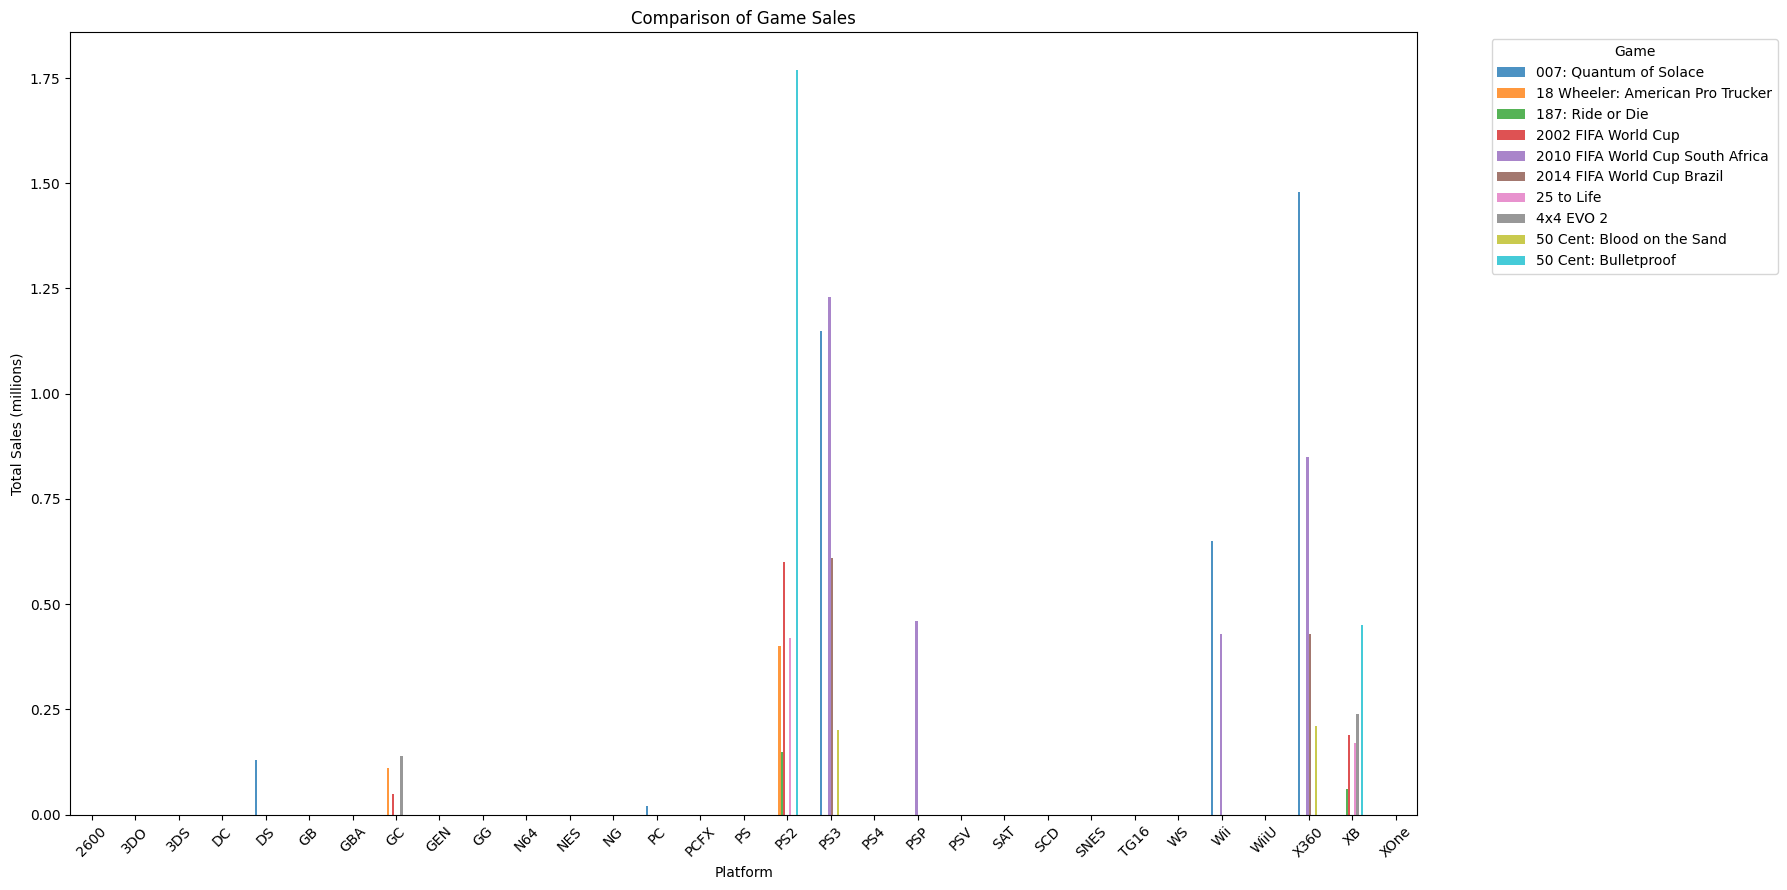

In [23]:
example_games = sales_comparison.head(10)

example_games.T.plot(kind='bar', 
                     figsize=(18, 9), 
                     alpha=0.8,
                     title='Comparison of Game Sales')

plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.legend(title='Game', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 

plt.show()

###  Rentabilidad de juegos por género

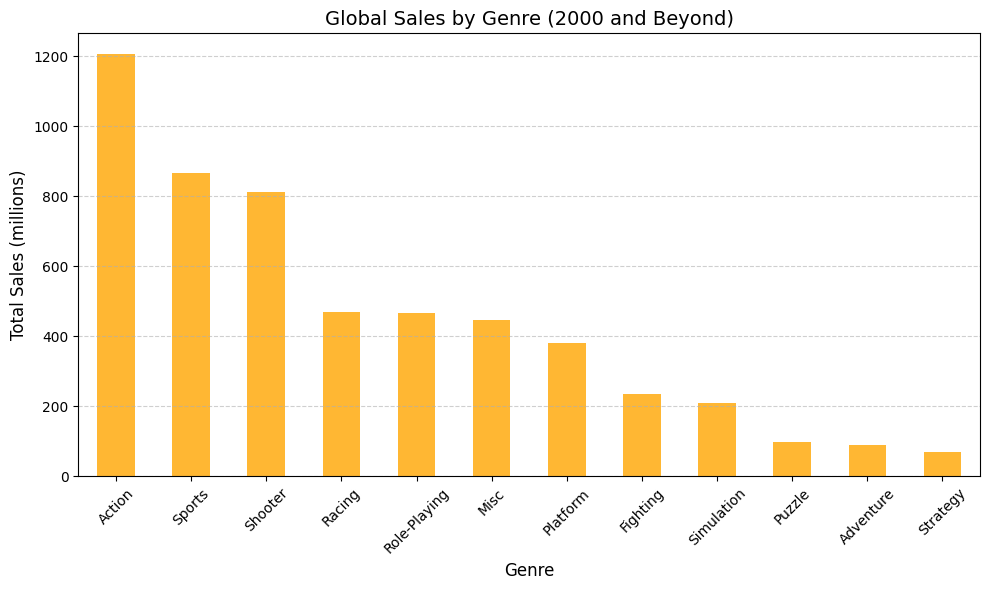

In [24]:
genre_sales = df[df['year_of_release'] >= 2000].groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Visualizar las ventas globales por género
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Global Sales by Genre (2000 and Beyond)', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Sales (millions)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

###### Análisis del gráfico

Pude extraer las siguientes conclusiones sobre los géneros de videojuegos más rentables a partir del año 2000:

* Acción y deportes: Estos dos géneros superando significativamente a los demás. Esto sugiere que el grueso de los jugadores prefieren experiencias de juego rápidas, competitivas y con una alta dosis de adrenalina.

* Los juegos de disparos también ocupan un lugar destacado en el ranking, lo que indica una demanda que combinen acción intensa con elementos tácticos.

* Los juegos de rol no son de los géneros más populares, sin embargo manteniene una base de seguidores sólida.

* Cifras bajas en géneros como simulación, lucha y estrategia:  Se debe a que son juegos de nicho, por ser géneros que requieren una mayor inversión de tiempo por parte del jugador.

En conclusión, los géneros de acción, deportes y shooters lideran en rentabilidad desde el 2000, aunque existen nichos para géneros más especializados que reflejan la diversidad de gustos de los jugadores.

## Perfíl de usuario para cada región

###  Las cinco plataformas principales

In [25]:
# Filtrar ventas por región
regions = ['na_sales', 'eu_sales', 'jp_sales']

platform_sales_by_region = {}
for region in regions:
    platform_sales_by_region[region] = df.groupby('platform')[region].sum().sort_values(ascending=False).head(5)

In [26]:
# Combinar datos en un DataFrame para análisis comparativo
top_platforms_df = pd.DataFrame(platform_sales_by_region)

market_share = top_platforms_df.div(top_platforms_df.sum()) * 100

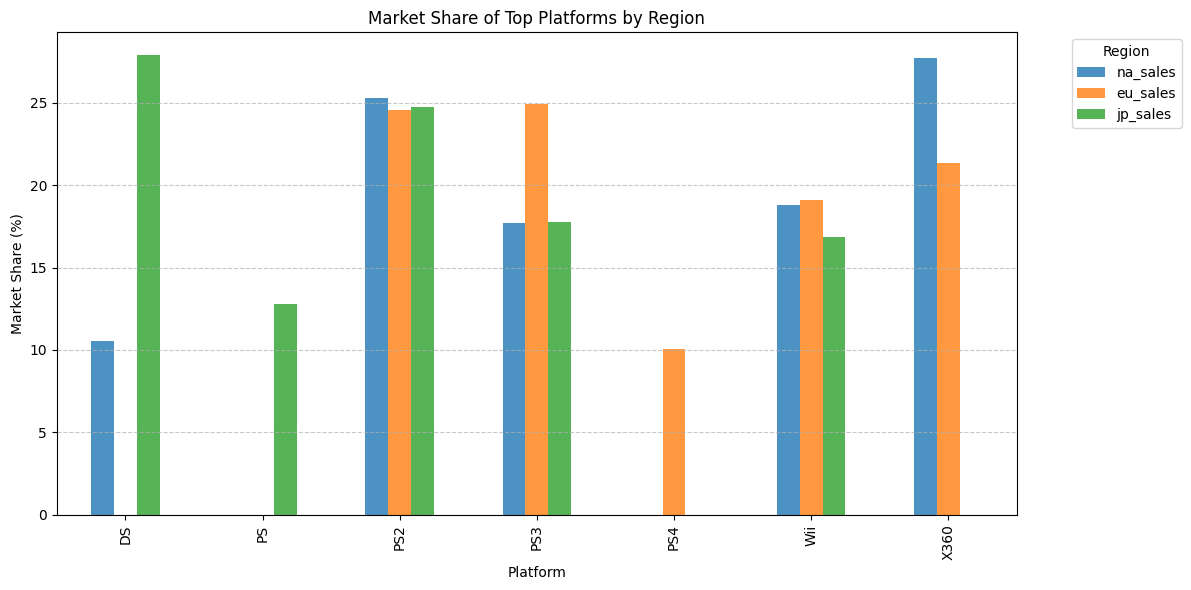

Top platforms by region:
          na_sales  eu_sales  jp_sales
platform                              
DS          206.99       NaN     86.75
PS             NaN       NaN     39.71
PS2         497.33    273.21     77.08
PS3         347.61    277.34     55.21
PS4            NaN    111.78       NaN
Wii         368.69    212.19     52.51
X360        544.36    237.37       NaN


In [27]:
# Gráfico para comparar cuotas de mercado por región
market_share.plot(kind='bar', figsize=(12, 6), alpha=0.8)
plt.title('Market Share of Top Platforms by Region')
plt.xlabel('Platform')
plt.ylabel('Market Share (%)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Descripción de las variaciones
print("Top platforms by region:")
print(top_platforms_df)

###### Análisis de las Cuotas de Mercado

El gráfico muestra que las preferencias de los jugadores varían significativamente entre las regiones de Norteamérica (NA), Europa (EU) y Japón (JP). 

* Tendencias:
Dominio de PlayStation en Norteamérica y Europa: Las consolas PlayStation (PS2 y PS3) consolidan la posición de Sony como líder del mercado.

* La Nintendo Wii logró un gran éxito a nivel mundial, gracias a su enfoque en la jugabilidad casual y familiar.

* Existen diferencias en las preferencias de los jugadores según la región. Por ejemplo, el DS tuvo un mayor éxito en Japón y Norteamérica, mientras que el X360  destacó principalmente en Norteamérica.

* Ausencia de datos: La falta de datos para algunas plataformas y regiones dificulta una comparación completa.

###  Los 5 Géneros principales

In [28]:
# Agrupar los datos por género y sumar las ventas por región
genre_sales = df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Ordenar los géneros por ventas en cada región y seleccionar los 5 principales
top_genres_na = genre_sales.sort_values(by='na_sales', ascending=False).head(5)
top_genres_eu = genre_sales.sort_values(by='eu_sales', ascending=False).head(5)
top_genres_jp = genre_sales.sort_values(by='jp_sales', ascending=False).head(5)

print("Top Genres in NA:", top_genres_na)
print("Top Genres in EU:", top_genres_eu)
print("Top Genres in JP:", top_genres_jp)

Top Genres in NA:          na_sales  eu_sales  jp_sales
genre                                
Action     632.81    407.33     77.80
Sports     493.73    262.59     35.20
Shooter    455.67    264.74     18.63
Misc       248.65    131.48     33.42
Racing     243.68    173.21     28.05
Top Genres in EU:          na_sales  eu_sales  jp_sales
genre                                
Action     632.81    407.33     77.80
Shooter    455.67    264.74     18.63
Sports     493.73    262.59     35.20
Racing     243.68    173.21     28.05
Misc       248.65    131.48     33.42
Top Genres in JP:               na_sales  eu_sales  jp_sales
genre                                     
Role-Playing    221.08    119.78    123.28
Action          632.81    407.33     77.80
Platform        205.36    113.36     43.31
Sports          493.73    262.59     35.20
Misc            248.65    131.48     33.42


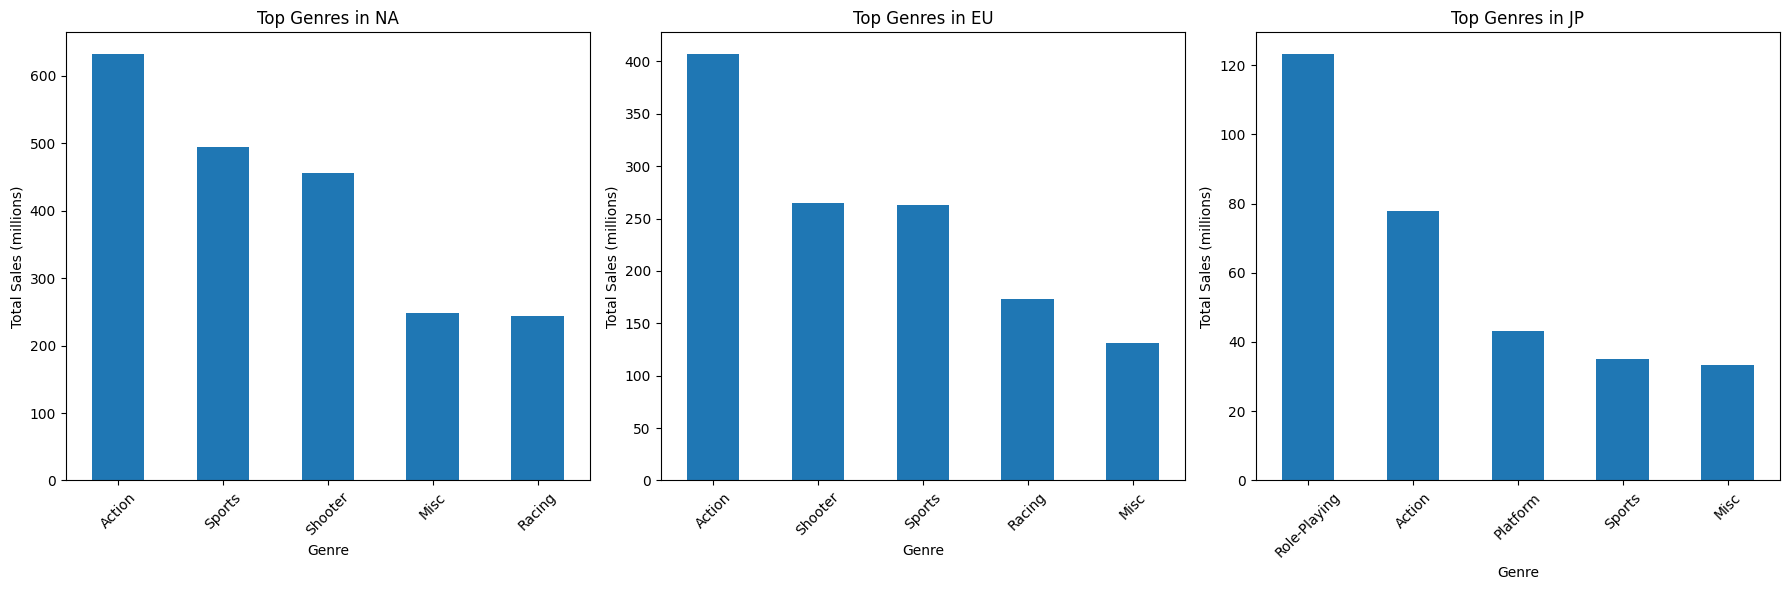

In [29]:
# Graficar los géneros más vendidos por región
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

top_genres_na.plot(kind='bar', y='na_sales', ax=ax[0], title="Top Genres in NA", legend=False)
top_genres_eu.plot(kind='bar', y='eu_sales', ax=ax[1], title="Top Genres in EU", legend=False)
top_genres_jp.plot(kind='bar', y='jp_sales', ax=ax[2], title="Top Genres in JP", legend=False)

for i in range(3):
    ax[i].set_xlabel('Genre')
    ax[i].set_ylabel('Total Sales (millions)')
    ax[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

###### Géneros Dominantes por Región

Basado en los gráficos proporcionados, podemos realizar el siguiente análisis:

Tendencias Generales
Dominancia de los géneros de acción y deportes: Estos géneros se destacan como los más populares en las tres regiones, lo que sugiere una preferencia generalizada por experiencias de juego rápidas, competitivas y con una alta dosis de adrenalina.

Norteamérica:

* Action: Dominado por shooters en primera persona y juegos de acción-aventura.
* Sports: Fútbol americano, baloncesto y otros deportes populares en la región.
* Shooter: Juegos de disparos en primera persona.
* Racing: Juegos de carreras arcade y simuladores.
* Misc: Categoría que puede incluir muchos géneros, como lucha, plataformas y aventuras gráficas.

Europa:

* Action: Similar a Norteamérica, con una fuerte presencia de shooters.
* Sports: Fútbol y otros deportes europeos.
* Racing: Carreras de fórmula 1 y otros deportes de motor.
* Role Playing: RPG occidentales y japoneses, con un enfoque en los juegos de rol tácticos.
* Misc: Categoría que puede incluir varios géneros, como aventuras gráficas y simuladores.

Japón:

* Role Playing: Dominado por los JRPG (juegos de rol japoneses), con un énfasis en la narrativa y sistemas de combate por turnos.
* Action: Juegos con un estilo visual y mecánico único, como los juegos de lucha y los beat'em up.
* Platform: Juegos de plataformas, un género con una larga tradición en Japón.
* Sports: Juegos de deportes, aunque con una menor variedad que en otras regiones.
* Misc: Incluye simuladores y juegos de estrategia, entre gran variedad de géneros.

###  Clasificaciones de ESRB

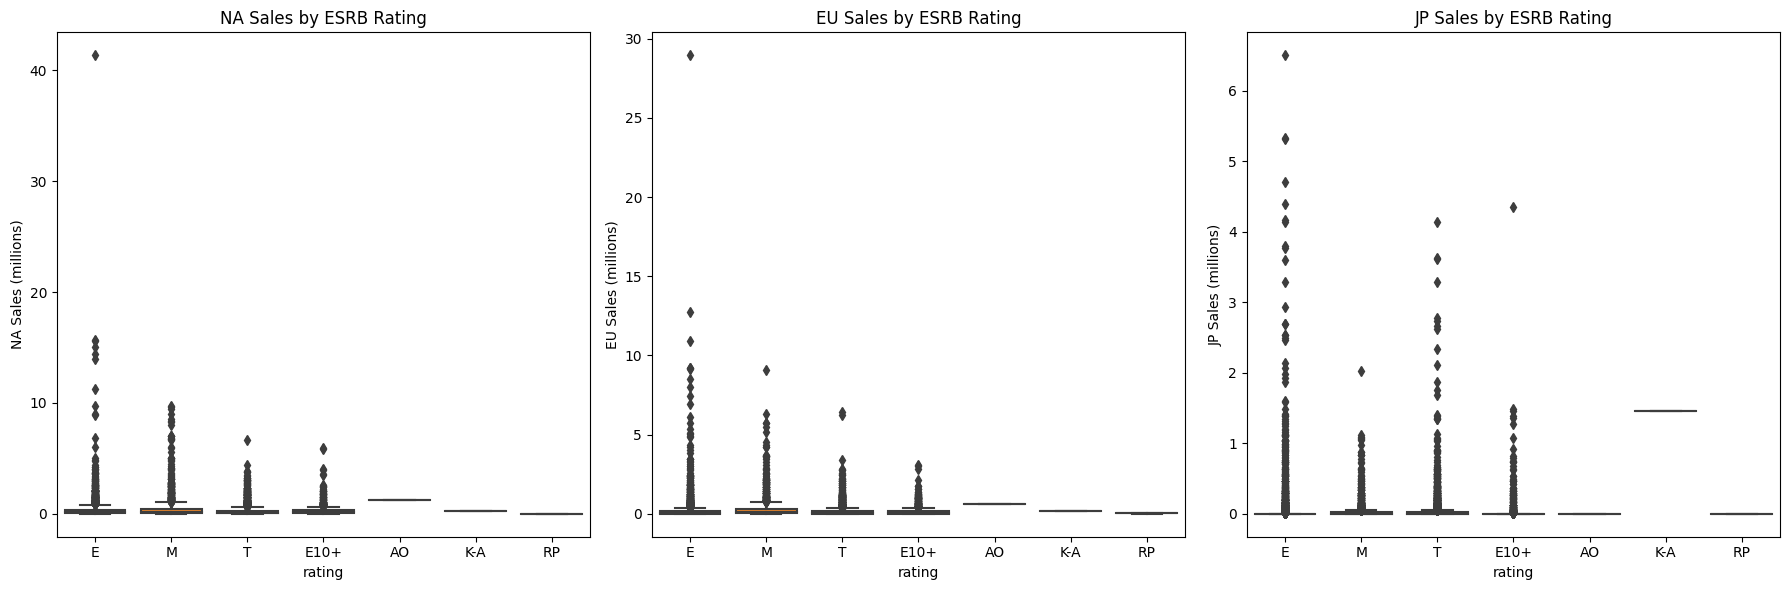

In [30]:
df_clean = df.dropna(subset=['rating', 'na_sales', 'eu_sales', 'jp_sales'])

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# NA Sales
sns.boxplot(x='rating', y='na_sales', data=df_clean, ax=axes[0])
axes[0].set_title('NA Sales by ESRB Rating')
axes[0].set_ylabel('NA Sales (millions)')

# EU Sales
sns.boxplot(x='rating', y='eu_sales', data=df_clean, ax=axes[1])
axes[1].set_title('EU Sales by ESRB Rating')
axes[1].set_ylabel('EU Sales (millions)')

# JP Sales
sns.boxplot(x='rating', y='jp_sales', data=df_clean, ax=axes[2])
axes[2].set_title('JP Sales by ESRB Rating')
axes[2].set_ylabel('JP Sales (millions)')

plt.tight_layout()
plt.show()

###### Las Clasificaciones ESRB y las Ventas
Tendencias Generales:

* Los juegos clasificados como E (Everyone) y T (Teen) suelen tener las ventas más altas en todas las regiones.
* Los juegos clasificados como AO (Adults Only) tienen ventas significativamente menores.

Aunque hay tendencias comunes, existen diferencias específicas en la distribución de las ventas por clasificación en cada región.

###### Impacto de las Clasificaciones ESRB:

* Influencia en las decisiones de compra: Especialmente de padres y consumidores conscientes de la edad.

* Restricciones comerciales: Las clasificaciones más altas pueden limitar la distribución y las ventas en ciertos canales.

* Segmentación del mercado: Las clasificaciones permiten a las empresas segmentar su público objetivo.

###### Conclusiones:

Las clasificaciones ESRB son un factor importante, pero no el más determinante, que influye en las ventas de videojuegos.

Otros factores como la calidad, el marketing y las tendencias del mercado también juegan un papel crucial.
Las clasificaciones más bajas, como E y T, tienden a ser más comerciales debido a su mayor audiencia.
En resumen:

Los juegos con clasificaciones más generales como E y T suelen vender más, pero las clasificaciones más restrictivas como AO tienen un mercado más limitado. Las regiones muestran variaciones en sus preferencias, pero la tendencia general es clara: los consumidores prefieren juegos con contenido más accesible y menos restringido.

## Test de Hipótesis

###  Hipótesis Nula (H0) _ Hipótesis Alternativa (HA)

H0= No hay diferencia significativa en el promedio de los usuarios para las plataformas Xbox One y PC

HA= Existe una diferencia significativa en el promedio de los usuarios para las plataformas Xbox One y PC
    
Definir el nivel de significancia
alpha = 0.05 

In [31]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [32]:
xbox_scores = df[df["platform"] == "XOne"]["user_score"]

pc_scores = df[df["platform"] == "PC"]["user_score"]

# Calcular los promedios
xbox_mean = xbox_scores.mean()
pc_mean = pc_scores.mean()

print("Calificaciones para Xbox One:")
print(xbox_scores)
print(f"Promedio para Xbox One: {xbox_mean:.2f}\n")

print("Calificaciones para PC:")
print(pc_scores)
print(f"Promedio para PC: {pc_mean:.2f}")

Calificaciones para Xbox One:
165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16264    8.1
16314    3.1
16392    6.3
16597    6.0
16630    8.2
Name: user_score, Length: 161, dtype: float64
Promedio para Xbox One: 6.51

Calificaciones para PC:
85       7.6
138      7.3
192      4.0
218      8.2
284      9.1
        ... 
16620    8.2
16640    3.8
16692    7.6
16696    5.8
16702    7.2
Name: user_score, Length: 677, dtype: float64
Promedio para PC: 7.06


In [33]:
#HO: No hay diferencia en las varianzas
#HA: Existe una diferencia significativa en las varianzas

alpha = 0.05

levene_stat, pvalue_levene = levene(xbox_scores, pc_scores)

if pvalue_levene <= alpha:
    print("Existe una diferencia significativa en las varianzas")
    equal_var = False
else:
    print("No hay diferencia en las varianzas")
    equal_var = True

print('p-valor levene:', pvalue_levene)

No hay diferencia en las varianzas
p-valor levene: 0.26718762858867506


In [34]:
# Prueba las hipótesis
t_value, pvalue = ttest_ind(xbox_scores, pc_scores, equal_var=True)

if pvalue <= alpha:
    print("No hay evidencia estadísticamente significativa para rechazar la hipótesis nula.")
else:
    print("Hay evidencia estadísticamente significativa para rechazar la hipótesis nula.")

print('p-valor', pvalue)

No hay evidencia estadísticamente significativa para rechazar la hipótesis nula.
p-valor 2.5360963570795332e-05


###### Formulación de las hipótesis nula y alternativa:

Formulé la Hipótesis Nula y la Aternativa, para después poder procesar los tests de hipótesis.

Criterio utilizado para probar las hipótesis y por qué:
El criterio utilizado para probar las hipótesis se basa en los p-values obtenidos de dos tests estadísticos: el t-test para muestras independientes y el test de Levene.

Test t (ttest_ind): En este caso, el p-value obtenido es 2.5360, que es mucho menor que 0.05, lo que significa que hay suficiente evidencia para rechazar la hipótesis nula y concluir que las medias de las puntuaciones en Xbox y PC son significativamente diferentes.

Test de Levene (levene): Este test se utiliza para comprobar si las varianzas de los dos grupos son iguales. Si el p-value del test de Levene es mayor que 0.05, no rechazamos la hipótesis nula y aceptamos que las varianzas son iguales. El p-value obtenido es 0.2671, que es mayor que 0.05, por lo que no rechazamos la hipótesis nula y concluimos que las varianzas de las puntuaciones en Xbox y PC son iguales.

###  Hipótesis Nula (H0) _ Hipótesis Alternativa (HA)

H0= No hay diferencia significativa en las calificaciones promedio de los usuarios para los géneros de Acción y Deportes

HA= Existe una diferencia significativa en  las calificaciones promedio de los usuarios para los géneros de Acción y Deportes

Definir el nivel de significancia
alpha = 0.05 

In [35]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [36]:
action_scores = df[df["genre"] == 'Action']["user_score"]

sports_scores = df[df["genre"] == "Sports"]["user_score"]

# Calcular los promedios
action_mean = xbox_scores.mean()
sports_mean = pc_scores.mean()

print("Promedio para Action:")
print(action_scores)
print(f"Promedio para Action: {action_mean:.2f}\n")

print("Promedio para Sports:")
print(sports_scores)
print(f"Promedio para Sports: {sports_mean:.2f}")

Promedio para Action:
16       8.2
17       9.0
23       8.1
24       8.7
38       8.5
        ... 
16620    8.2
16652    8.5
16663    2.4
16692    7.6
16695    7.5
Name: user_score, Length: 1875, dtype: float64
Promedio para Action: 6.51

Promedio para Sports:
0        8.0
3        8.0
13       7.7
15       7.4
77       4.3
        ... 
16452    7.5
16474    7.5
16528    6.9
16546    9.5
16551    7.5
Name: user_score, Length: 1181, dtype: float64
Promedio para Sports: 7.06


In [37]:
#HO: No hay diferencia en las varianzas
#HA: Existe una diferencia significativa en las varianzas

alpha = 0.05

levene_stat, pvalue_levene = levene(action_scores, sports_scores)

if pvalue_levene <= alpha:
    print("Existe una diferencia significativa en las varianzas")
    equal_var = False
else:
    print("No hay diferencia en las varianzas")
    equal_var = True

print('p-valor levene:', pvalue_levene)

No hay diferencia en las varianzas
p-valor levene: 0.4051143544831557


In [38]:
# Prueba las hipótesis
t_value, pvalue = ttest_ind(action_scores, sports_scores, equal_var=True)

if pvalue <= alpha:
    print("No hay evidencia estadísticamente significativa para rechazar la hipótesis nula.")
else:
    print("Hay evidencia estadísticamente significativa para rechazar la hipótesis nula.")

print('p-valor', pvalue)

Hay evidencia estadísticamente significativa para rechazar la hipótesis nula.
p-valor 0.2961116931712463


###### Criterio para probar las hipótesis y por qué

Para probar las hipótesis, utilicé este procedimiento:

* Primero formulé la Hipótesis Nula y la Alternativa

* Verificación de igualdad de varianzas (Test de Levene):
Antes de realizar el t-test, se usa el test de Levene para comprobar si las varianzas de las calificaciones en ambos géneros son iguales.

Resultado del test de Levene: p-valor = 0.4051.
Lo que indica que las varianzas son iguales

Por lo tanto, se utiliza un t-test estándar para muestras independientes asumiendo igualdad de varianzas.

* T-test para muestras independientes:
Se realiza un t-test para comparar las medias de las calificaciones entre los géneros de Acción y Deportes.

Resultado del t-test: p-valor = 0.2961
Esto indica que no se puede concluir que las calificaciones promedio de los usuarios para los géneros de Acción (6.49) y Deportes (7.05) sean significativamente diferentes.

* Aunque los promedios son ligeramente diferentes (Action: 6.49, Sports: 7.05), los resultados del análisis estadístico indican que no hay suficiente evidencia para afirmar que esta diferencia sea significativa.

## Conclusión final

* Resumen de los Hallazgos Clave
Los géneros de Acción y Deportes lideran en ventas globales y recepción positiva por parte de los usuarios, mientras que los juegos multiplataforma maximizan su alcance y éxito. Las reseñas de usuarios con puntuaciones superiores a 7 son un indicador clave de preferencia, y los lanzamientos durante el último trimestre del año destacan como una oportunidad estratégica.

* Las decisiones tomadas en el análisis permitieron extraer patrones claros y accionables. La segmentación de géneros, plataformas y calificaciones mostró la importancia de trabajar con datos limpios y bien organizados, siendo la base de este descubrimiento.

* Desarrollé mi propósito inicial al identificar las claves del éxito para planificar campañas publicitarias efectivas. Este análisis coloca a Ice en una posición estratégica para aprovechar los juegos más prometedores en 2017.

* Relevancia de los Hallazgos
Estos insights permitirán a Ice conectar mejor con su audiencia, optimizar recursos y destacarse en un mercado competitivo. Con estos resultados, podemos convertir juegos con potencial en grandes éxitos.

###### Recomendaciones

* Apostar por campañas en géneros como Acción y Deportes.
* Enfocar esfuerzos en lanzamientos multiplataforma y maximizar las campañas del cuarto trimestre.
* Incentivar reseñas positivas para mejorar la percepción de los usuarios.
* Seguir explorando tendencias emergentes como Aventura y RPG.



* El éxito no es solo un objetivo, es el resultado de entender los datos, las tendencias y, sobre todo, a nuestros usuarios. Este análisis permitirá transformar información en acción, inspirando campañas que no solo vendan juegos, sino que también conecten con millones de jugadores en todo el mundo. 